In [1]:
import numpy as np
import matplotlib.pyplot as plt

№1

In [2]:
X = np.array([ [   1,    1,  500,    1],
               [   1,    1,  700,    1],
               [   1,    2,  750,    2],
               [   1,    5,  600,    1],
               [   1,    3, 1450,    2],
               [   1,    0,  800,    1],
               [   1,    5, 1500,    3],
               [   1,   10, 2000,    3],
               [   1,    1,  450,    1],
               [   1,    2, 1000,    2]], dtype=np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype=np.float64)

In [3]:
X

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [4]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

In [5]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [6]:
X_st = X.copy()
X_st[:, 1:4] = standard_scale(X[:, 1:4])

In [7]:
X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

In [8]:
def calc_logloss(y, y_pred):
    err = 0
    for i in range(len(y)):
        if y_pred[i] == 0:
            err += (1.0 - y[i]) * np.log(1.0 - y_pred[i])
        elif y_pred[i] == 1:
            err += y[i] * np.log(y_pred[i])
        else:
            err += y[i] * np.log(y_pred[i]) + (1.0 - y[i]) * np.log(1.0 - y_pred[i])
    return - err / len(y) 

In [9]:
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0])
calc_logloss(y1, y_pred1)

0.05268025782891314

In [10]:
y1 = np.array([1, 0])
y_pred1 = np.array([0.9, 0])
calc_logloss(y1, y_pred1)

0.05268025782891314

In [11]:
y1 = np.array([1, 0])
y_pred1 = np.array([1, 0.1])
calc_logloss(y1, y_pred1)

0.05268025782891314

№2

In [12]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [13]:
z = np.linspace(-10, 10, 101)

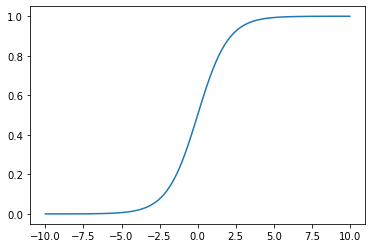

In [14]:
probabilities = sigmoid(z)

plt.plot(z, probabilities)
plt.show()

In [15]:
def eval_model(X, y, iterations, eta=1e-4):
    np.random.seed(42)
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(iterations):
        z = np.dot(X, W)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        
        dQ = 1/n * X.T @ (y_pred - y)
        W -= eta * dQ
        if i % (iterations / 10) == 0:
            print(f'итерация: {i}, logloss: {err}, веса: {W}')
            
    return W

W = eval_model(X_st, y, iterations=30000, eta=2)

итерация: 0, logloss: 0.760958797591889, веса: [ 0.42571582 -0.67990333  0.18083512  1.2740703 ]
итерация: 3000, logloss: 0.09398585082329006, веса: [  4.19312496 -11.92334562 -12.11107682  28.01038619]
итерация: 6000, logloss: 0.07477893950285999, веса: [  5.57275146 -15.11816383 -16.49800681  37.09323043]
итерация: 9000, logloss: 0.06342360432421358, веса: [  6.61922944 -17.32436088 -20.0701547   44.1088435 ]
итерация: 12000, logloss: 0.05504761255693959, веса: [  7.51628724 -19.13441141 -23.19687847  50.13566433]
итерация: 15000, logloss: 0.04849095012578076, веса: [  8.31012234 -20.71707085 -25.9759663   55.46825942]
итерация: 18000, logloss: 0.04321922501033891, веса: [  9.02223352 -22.13378849 -28.46963092  60.25027825]
итерация: 21000, logloss: 0.03890184622325639, веса: [  9.66692538 -23.41688995 -30.72575258  64.5782319 ]
итерация: 24000, logloss: 0.03531232505753843, веса: [ 10.25496565 -24.58837457 -32.78199457  68.52484051]
итерация: 27000, logloss: 0.03228879705829412, вес

In [16]:
W

array([ 11.29308481, -26.65957061, -36.40817499,  75.4899648 ])

№3

In [17]:
def calc_pred_proba(W, X):
    y_pred_proba = sigmoid(np.dot(X, W))
    return y_pred_proba

In [18]:
calc_pred_proba(W, X_st)

array([1.35969661e-01, 4.73334349e-08, 1.00000000e+00, 3.64861679e-21,
       9.90286818e-01, 3.21938919e-07, 1.00000000e+00, 2.48259568e-03,
       8.70461127e-01, 1.00000000e+00])

In [19]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

№4

In [20]:
def calc_pred(W, X):
    p = calc_pred_proba(W, X)
    pred_proba  = (p > 0.5).astype(int)
    return pred_proba 

In [21]:
calc_pred(W, X_st)

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1])

In [22]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1.])

№6

Модель спокойно могла переобучиться из-за малого количества данных, из-за больших весов признаков (или слишком малых)